<a href="https://colab.research.google.com/github/mdona/MyProject/blob/master/HH_reweighting_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download and setup

First we clone the repository

In [ ]:
!git clone https://gitlab.com/danielwinterbottom/HHReweighter.git

Cloning into 'HHReweighter'...
remote: Enumerating objects: 187, done.
remote: Counting objects: 100% (98/98), done.
remote: Compressing objects: 100% (93/93), done.
remote: Total 187 (delta 44), reused 0 (delta 0), pack-reused 89 (from 1)
Receiving objects: 100% (187/187), 108.88 MiB | 36.45 MiB/s, done.
Resolving deltas: 100% (77/77), done.


In [ ]:
%cd HHReweighter

/content/HHReweighter


The matrix elements are computed using Madgraph and the relevant code is stored as tarballs for three different COM energies (12, 13.6, 14 TeV).
We need to extract the tarball for the energy we are interested in.
In today's examples we will use 13 TeV

In [ ]:
!tar -xvf rwgt_13TeV.tar.gz

rwgt_13TeV/
rwgt_13TeV/rw_me/
rwgt_13TeV/rw_me/Source/
rwgt_13TeV/rw_me/Source/MODEL/
rwgt_13TeV/rw_me/Source/MODEL/couplings.o
rwgt_13TeV/rw_me/Source/MODEL/param_read.inc
rwgt_13TeV/rw_me/Source/MODEL/input.inc
rwgt_13TeV/rw_me/Source/MODEL/mp_input.inc
rwgt_13TeV/rw_me/Source/MODEL/intparam_definition.inc
rwgt_13TeV/rw_me/Source/MODEL/mp_intparam_definition.inc
rwgt_13TeV/rw_me/Source/MODEL/actualize_mp_ext_params.inc
rwgt_13TeV/rw_me/Source/MODEL/coupl.inc
rwgt_13TeV/rw_me/Source/MODEL/mp_coupl.inc
rwgt_13TeV/rw_me/Source/MODEL/mp_coupl_same_name.inc
rwgt_13TeV/rw_me/Source/MODEL/coupl_write.inc
rwgt_13TeV/rw_me/Source/MODEL/couplings.f
rwgt_13TeV/rw_me/Source/MODEL/couplings1.f
rwgt_13TeV/rw_me/Source/MODEL/couplings2.f
rwgt_13TeV/rw_me/Source/MODEL/mp_couplings2.f
rwgt_13TeV/rw_me/Source/MODEL/makeinc.inc
rwgt_13TeV/rw_me/Source/MODEL/param_write.inc
rwgt_13TeV/rw_me/Source/MODEL/model_functions.inc
rwgt_13TeV/rw_me/Source/MODEL/model_functions.f
rwgt_13TeV/rw_me/Source/MODEL/lha

# An example of how to reweight a single event

Now we will look at how to compute the weights for different reference samples.
Reference sample = the MC you want to reweight.
The code supports two options for the reweighting:
1. reweight a SM di-Higgs samples
2. reweight a H->h125h125 resonant sample

First import the reweighting module

In [ ]:
from python.reweight import *

First we need to initialize the module.
When we initialize the module we need to specify what mass and width points we need to compute weights for.
We can do this using a dictionary to specify the mass and relative width (width/mass) points we are interested in.

In [ ]:
mass_widths_dict = {
  300: [0.01,0.05],
  500: [0.02,0.1],
  620: [0.007422],
  250: [0.01],
}

The dictionary keys correspond to the mass points and the lists are the relative widths.
In the example above we are requesting weights to be computed for M=300 GeV with relative widths of 1% and 5%,  M=500 GeV with relative widths of 2% and 10%, and a M=620 GeV point with relative width ~0.7%

When initializing the reweighting model you also have to specify what reference sample you are reweighting.
For reweighting a SM di-Higgs sample (option 1), the module is initialized using:

In [ ]:
rw = HHReweight(mass_widths_dict=mass_widths_dict)

INFO: Reweighting SM process


Now we can compute weights for each event in our sample.
To compute the weights the minimum information that needs to be passed to the module is the pdgid and 4-vectors of the two gen-level higgs bosons.
The information should be stored in a list like [pdgid, E, px, py, pz]:

In [ ]:
higgs_1 = [25, 8.1365468547e+02, -2.5093111382e+01, 1.6194796557e+02, -7.8711634426e+02]
higgs_2 = [25, 7.6439513889e+02, 2.5093111382e+01, -1.6194796557e+02, -7.3608295767e+02]

parts = [higgs_1,higgs_2]

In [ ]:
rweights_sm = rw.ReweightEvent(parts)
print(rweights_sm)

{'box': 1.9113049495360301, 'schannel_h': 0.15952655200636745, 'box_and_schannel_h_i': -1.0708315015423968, 'schannel_H_Mass_300_RelWidth_0p01': 0.06591135193405485, 'box_and_schannel_H_i_Mass_300_RelWidth_0p01': -0.6866254144208953, 'schannel_H_and_schannel_h_i_Mass_300_RelWidth_0p01': 0.20506862104959805, 'schannel_H_Mass_300_RelWidth_0p05': 0.06571229954377966, 'box_and_schannel_H_i_Mass_300_RelWidth_0p05': -0.6779997320069435, 'schannel_H_and_schannel_h_i_Mass_300_RelWidth_0p05': 0.20444936093073166, 'schannel_H_Mass_500_RelWidth_0p02': 0.06600858198539206, 'box_and_schannel_H_i_Mass_500_RelWidth_0p02': 0.6966155196973769, 'schannel_H_and_schannel_h_i_Mass_500_RelWidth_0p02': -0.20483197003154816, 'schannel_H_Mass_500_RelWidth_0p1': 0.060357315098579854, 'box_and_schannel_H_i_Mass_500_RelWidth_0p1': 0.670409477386852, 'schannel_H_and_schannel_h_i_Mass_500_RelWidth_0p1': -0.18729521832890744, 'schannel_H_Mass_620_RelWidth_0p007422': 0.009209482923509529, 'box_and_schannel_H_i_Mass_6

We see that several weights are stored in this map.
These correspond to individual pieces of the total process.

'box': correspond to the box diagram only scenario (SM with lambda=0).

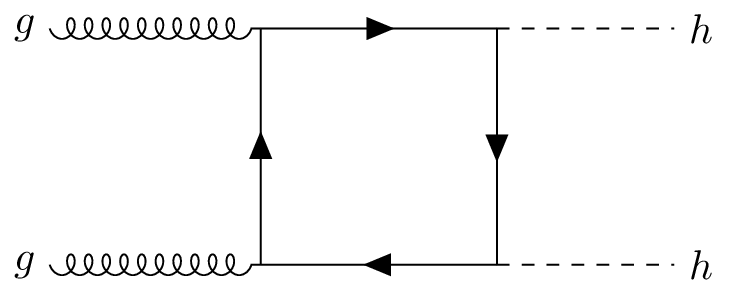

'schannel_h': corresponds to the SM s-channel only diagram.
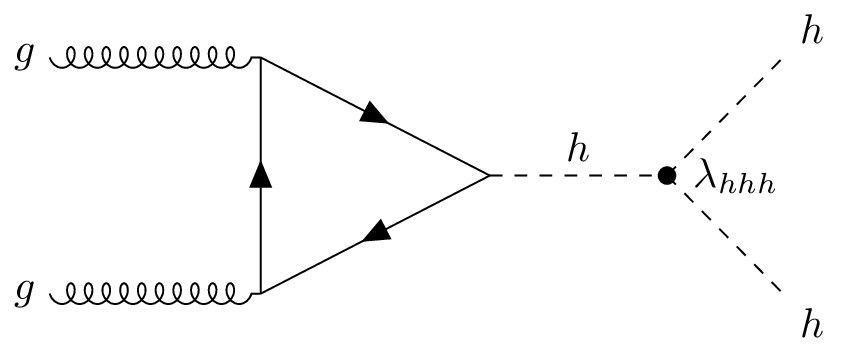


'box_and_schannel_h_i': corresponds to the inteference between the 2 SM diagrams

The weights are computed using SM-like couplings for $\lambda_{hhh}$ and $y_{t}$, $\kappa_{\lambda_{hhh}} = \kappa_t = 1$ $\kappa_{t}=y_{t}/y_{t}^{\text{SM}}=1$ and $\kappa_{\lambda_{hhh}} = \lambda_{hhh} / \lambda_{\text{SM}}=1$.

There are also weights that correspond to the resonant s-channel diagram, for each mass and width requested called e.g "schannel_H_Mass_300_RelWidth_0p01"

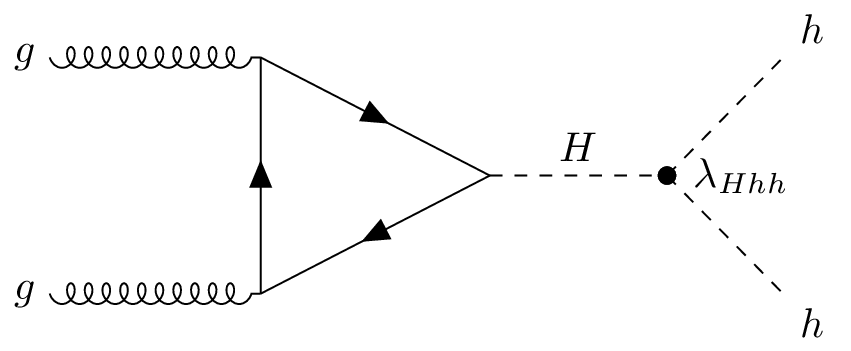


And there are also 2 inteference rates per mass and width points:

'box_and_schannel_H_i_Mass_300_RelWidth_0p01': which corresponds to the inteference between the resonant diagram and the SM-box diagram

'schannel_H_and_schannel_h_i_Mass_300_RelWidth_0p01': which corresponds to the inteference between the resonant diagram and the SM s-channel diagram

The weights are compited for SM-like couplings for the additional H boson.
$\kappa_t^{H} = y_t^H / y_t^{\text{SM}} =1$ and $\kappa_{\lambda_{Hhh}}= \lambda_{Hhh}/ \lambda_{\text{SM}} = 1$

To reweight a resonant sample (option 2) we use the option ReweightSChan=True.
In this case the weights will also depend on the mass and width of the resonant sample we are reweighting, so we need to specify these parameters when we initialize the module using the RefMassRelWidth option.
Lets suppose we are reweighting a M=500 GeV sample with a relative width of 1%:


In [ ]:
ref_mass = 500
ref_width = 0.02
rw = HHReweight(ReweightSChan=True,RefMassRelWidth=(ref_mass,ref_width),mass_widths_dict=mass_widths_dict)

INFO: Reweighting S-channel process with mass=500 and width=0.02


In [ ]:
rweights_res = rw.ReweightEvent(parts)
print(rweights_res)

{'box': 28.95540082892569, 'schannel_h': 2.416754718979894, 'box_and_schannel_h_i': -16.222610292997597, 'schannel_H_Mass_300_RelWidth_0p01': 0.9985270089371303, 'box_and_schannel_H_i_Mass_300_RelWidth_0p01': -10.402062788939295, 'schannel_H_and_schannel_h_i_Mass_300_RelWidth_0p01': 3.1066963549524593, 'schannel_H_Mass_300_RelWidth_0p05': 0.9955114557425585, 'box_and_schannel_H_i_Mass_300_RelWidth_0p05': -10.27138762285467, 'schannel_H_and_schannel_h_i_Mass_300_RelWidth_0p05': 3.0973148457571336, 'schannel_H_Mass_500_RelWidth_0p02': 1.0000000000000002, 'box_and_schannel_H_i_Mass_500_RelWidth_0p02': 10.553408340926648, 'schannel_H_and_schannel_h_i_Mass_500_RelWidth_0p02': -3.1031111996448923, 'schannel_H_Mass_500_RelWidth_0p1': 0.9143858765506757, 'box_and_schannel_H_i_Mass_500_RelWidth_0p1': 10.156398716991317, 'schannel_H_and_schannel_h_i_Mass_500_RelWidth_0p1': -2.8374373861016524, 'schannel_H_Mass_620_RelWidth_0p007422': 0.1395194783240098, 'box_and_schannel_H_i_Mass_620_RelWidth_0p

# Reweighting an event sample to the singlet model

We will now reweight a sample of MC events.
The sample of MC events were generated with Madgraph at LO and showered using Pythia.
The fileformat is .hepmc

First we install and import packages we will need to read and process the MC files.

In [ ]:
!curl https://cernbox.cern.ch/remote.php/dav/public-files/a75sa83ygIa63mM/hh_mc_6k.tar.gz --output hh_mc_6k.tar.gz
!tar -xvf hh_mc_6k.tar.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1524M  100 1524M    0     0  16.8M      0  0:01:30  0:01:30 --:--:-- 23.4M
events_res_m620_w0p02_6k.hepmc
events_singletBM620_6k.hepmc
events_sm_6k.hepmc


In [ ]:
# can uncomment these lines to download the bigger files (20k events each)
#!curl https://cernbox.cern.ch/remote.php/dav/public-files/8Nr1833sXdEQQGU/hh_mc.tar.gz --output hh_mc.tar.gz
#!tar -xvf hh_mc.tar.gz

In [ ]:
!pip install pyhepmc

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.6/644.6 kB 7.9 MB/s eta 0:00:00


In [ ]:
import pyhepmc
import pandas as pd
import numpy as np

First download and extract the MC files. This may take a few minutes.

Now we will define some useful functions for processing the MC files

In [ ]:
# functions to determine first and last copy of Higgs bosons
def isFirstCopy(particle):
    pdgid = particle.pid
    for parent in particle.parents:
        if parent.pid == pdgid:
            return False
    return True

def isLastCopy(particle):
    pdgid = particle.pid
    for child in particle.children:
        if child.pid == pdgid:
            return False
    return True

In [ ]:
# define a function that reads in the hepmc files
# the first and last copy of the Higgs bosons are stored
# We also compute and store some kinematic variables to be plotted later

def read_hepmc_particles(filename, Nevents):
    '''
    process hepmc file and store higgs boson 4-vectors and other variables as a pandas dataframe
    '''
    with pyhepmc.open(filename) as f:
        out = pd.DataFrame(columns=["weight", "h1_4vec", "h2_4vec", "h1_firstcopy_4vec", "h2_firstcopy_4vec"])
        for i, event in enumerate(f):
            xsec = event.cross_section.xsec()
            if i % 1000 == 0:
                print(f"Processing event {i+1}")
            if i >= Nevents:
                break
            higgs_firstcopy = []
            higgs_lastcopy = []
            for particle in event.particles:
                if particle.pid == 25:
                    if isFirstCopy(particle): higgs_firstcopy.append(particle.momentum)
                    if isLastCopy(particle): higgs_lastcopy.append(particle.momentum)

            if len(higgs_firstcopy) != 2 or len(higgs_lastcopy) != 2:
                print(f"Warning: Event {i} does not contain 2 Higgs bosons, skipping")
                continue

            # compute some other variables that can be used for plotting
            hh_mass = (higgs_lastcopy[0] + higgs_lastcopy[1]).m()
            hh_pt = (higgs_lastcopy[0] + higgs_lastcopy[1]).pt()
            lead_pt = max(higgs_lastcopy[0].pt(), higgs_lastcopy[1].pt())
            sublead_pt = min(higgs_lastcopy[0].pt(), higgs_lastcopy[1].pt())

            # define a "RECO" mass by applying a 5% Gaussian smearing to hh_mass
            hh_mass_reco = hh_mass*(1.+0.05*np.random.randn())

            out = pd.concat([out, pd.DataFrame([{"weight": xsec, "h1_4vec": higgs_lastcopy[0], "h2_4vec": higgs_lastcopy[1],
                              "h1_firstcopy_4vec": higgs_firstcopy[0], "h2_firstcopy_4vec": higgs_firstcopy[1],
                              "hh_mass": hh_mass, "hh_pt": hh_pt, "lead_pt": lead_pt, "sublead_pt": sublead_pt, "hh_mass_reco": hh_mass_reco
                              }])], ignore_index=True)

        return out

In [ ]:
# this function will loop over a datarame and compute and store the ME weights
def compute_weight(df, rw):
    """
    Compute the reweighting weights for the given dataframe
    """

    for i, row in df.iterrows():

        parts = []

        h1 = row["h1_4vec"]
        h2 = row["h2_4vec"]

        # define the particles: pdgid, E, px, py, pz
        p1 = [25, h1.e, h1.px, h1.py, h1.pz]
        p2 = [25, h2.e, h2.px, h2.py, h2.pz]

        parts = [p1,p2]

        rweights = rw.ReweightEvent(parts)

        if i % 1000 == 0:
            print(f"Processing event {i+1}")

        # add the weights to the dataframe
        for key in rweights:
            df.loc[i, key] = rweights[key]

    return df

First we process our MC to store the gen higgs information that we will need for the reweighting and some kinematic variables for plotting

In [ ]:
df_sm = read_hepmc_particles('events_sm_6k.hepmc',5000)

Processing event 1


<ipython-input-17-4a81b5cd0625>:37: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  out = pd.concat([out, pd.DataFrame([{"weight": xsec, "h1_4vec": higgs_lastcopy[0], "h2_4vec": higgs_lastcopy[1],


Processing event 1001
Processing event 2001
Processing event 3001
Processing event 4001
Processing event 5001


Now we compute the weights and add them to the dataframe

In [ ]:
mass_widths_dict = {
    620: [0.007422]
}

In [ ]:
rw = HHReweight(mass_widths_dict=mass_widths_dict)

INFO: Reweighting SM process


In [ ]:
df_sm = compute_weight(df_sm, rw)

Processing event 1
Processing event 1001
Processing event 2001
Processing event 3001
Processing event 4001


Now we will make a histogram for each contribution

In [ ]:
def MakeHistogram(df, var, weights=[], bins=100, range=(250,1000)):
    """
    Function to make a histogram of a variable var in the dataframe df
    The product of the weights specified in weights should be used to reweight the events
    The function returns the histogram
    """

    # define the binning
    # take the 95% quantiles of the variable and make 50 bins
    bins = np.linspace(range[0], range[1], bins)

    # make the histogram
    hist, bins = np.histogram(df[var], bins=bins, weights=np.prod([df[weight] for weight in weights], axis=0))

    hist_squared_weights, _ = np.histogram(df[var], bins=bins, weights=np.prod([df[weight]**2 for weight in weights], axis=0))
    hist_errors = np.sqrt(hist_squared_weights)

    return hist, hist_errors, bins

In [ ]:
weights = ['box', 'schannel_h', 'box_and_schannel_h_i',
           'schannel_H_Mass_620_RelWidth_0p007422',
           'box_and_schannel_H_i_Mass_620_RelWidth_0p007422',
           'schannel_H_and_schannel_h_i_Mass_620_RelWidth_0p007422'
           ]
hists = [(None,None,None)]*len(weights)
for i, weight in enumerate(weights):
    hists[i] = MakeHistogram(df_sm, 'hh_mass_reco', weights=['weight',weight],bins=40)


Now lets plot the distributions of the di-Higgs mass (with smearing)

In [ ]:
import matplotlib.pyplot as plt

def MakePlots(hists=[], labels=[]):
    """
    plot the histograms on the same axis
    """

    if len(hists) != len(labels):
        print("Number of histograms and labels do not match")
        return

    fig, ax = plt.subplots()
    for i, hist in enumerate(hists):
         y = hist[0]
         yerr = hist[1]
         bin_edges = hist[2]
         bin_centres = [(bin_edges[i]+bin_edges[i+1])/2 for i in range(len(bin_edges)-1)]
         step_plot = ax.step(bin_edges, np.append(y, y[-1]), where='post', label=labels[i], linewidth=1.5)
         step_color = step_plot[0].get_color()  # Extract the color used

         ax.errorbar(bin_centres, y, yerr=yerr, fmt='o', markersize=3, color=step_color)

    ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.3), ncol=2)

    plt.show()

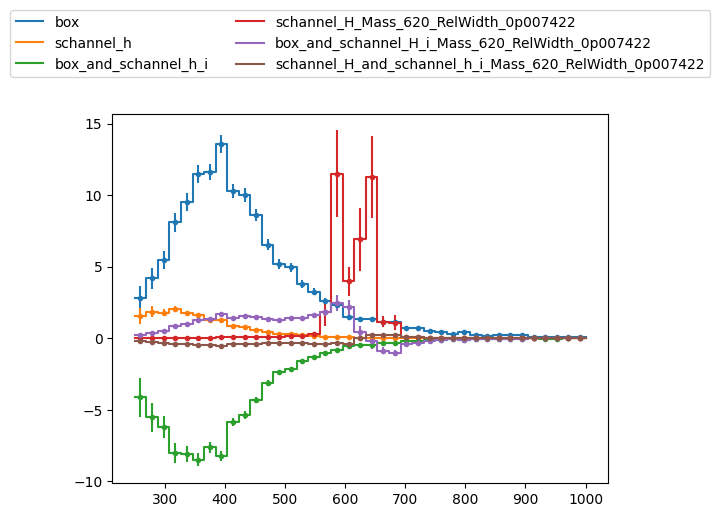

In [ ]:
MakePlots(hists=hists, labels=weights)

The distributions look generally sensible except for the resonant H->hh part.
This is because the reference sample for this component is not very populated in phase-space region where the resonance sits (M=620 GeV, with a narrow width ~0.7%)

For the resonant part of the spectrum we therefore recommend to use a dedicated resonant H->hh sample for the reweighting with the same mass and width not too differerent from the target.

Below we will reweight a M=620 GeV sample with 2% relative width to obtain our resonant term

First we need to produce the dataframes and add the weights as we did for the SM di-Higgs sample

In [ ]:
df_res = read_hepmc_particles('events_res_m620_w0p02_6k.hepmc',5000)

Processing event 1


<ipython-input-17-4a81b5cd0625>:37: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  out = pd.concat([out, pd.DataFrame([{"weight": xsec, "h1_4vec": higgs_lastcopy[0], "h2_4vec": higgs_lastcopy[1],


Processing event 1001
Processing event 2001
Processing event 3001
Processing event 4001
Processing event 5001


For the reweighting we need to remember to set ReweightSChan to true and specify the reference mass and width

In [ ]:
ref_mass = 620
ref_width = 0.02
rw = HHReweight(ReweightSChan=True,RefMassRelWidth=(ref_mass,ref_width),mass_widths_dict=mass_widths_dict)

INFO: Reweighting S-channel process with mass=620 and width=0.02


In [ ]:
df_res = compute_weight(df_res, rw)

Processing event 1
Processing event 1001
Processing event 2001
Processing event 3001
Processing event 4001


In [ ]:
hists_res = MakeHistogram(df_res, 'hh_mass_reco', weights=['weight','schannel_H_Mass_620_RelWidth_0p007422'],bins=40)

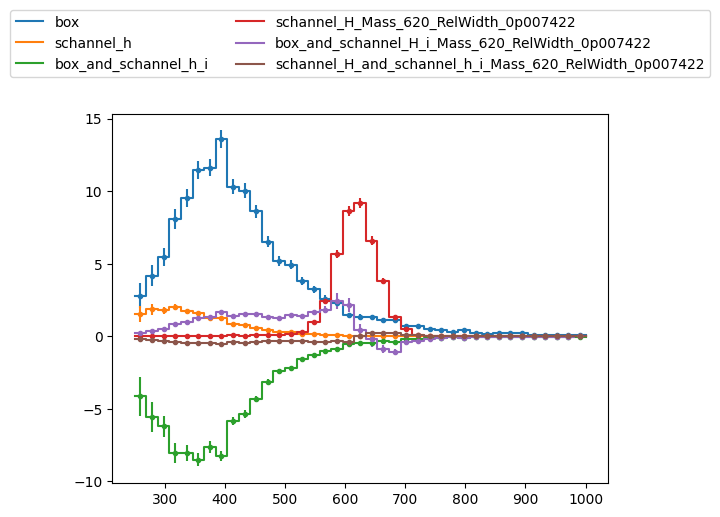

In [ ]:
hists_cmb = hists[:3]+[hists_res]+hists[4:]
MakePlots(hists=hists_cmb, labels=weights)

Now we have the individual histograms for all the contributions for SM-like couplings $\kappa_i=1$

We can now scale these histograms based on the model predictions

We are focusing on the singlet model which has three parameters $\tan\beta$ $\sin\alpha$ and $m_{\text{H}}$

The benchmark point we will evaluate has $\tan\beta=1$, $\sin\alpha=0.16$, and $m_{\text{H}}=620$ GeV

First we need compute our coupling modifiers.
In the singlet mode these have the following functional form at LO:

$\kappa_t = \cos{\alpha}$

$\kappa_t^{h} = \sin{\alpha}$

$\kappa_{\lambda_{hhh}} =\cos^3{\alpha}-\tan\beta\sin^3{\alpha}$

$\kappa_{\lambda_{Hhh}} = \frac{2m_{h}^2+m_{H}^2}{m_h^2}\,\frac{\sin( 2 \alpha)}{2}(\cos{\alpha} + \tan\beta\sin{\alpha})$

In [ ]:
sina = 0.16
tanb = 1.0
mH = 620.
mh = 125.

cosa = math.cos(math.asin(sina))

kappa_h_t = math.cos(math.asin(sina))

kappa_H_t = sina

kappa_lambda_hhh = cosa**3 - tanb*sina**3

kappa_lambda_Hhh = (2*mh**2 + mH**2)/mh**2 * (cosa**2*sina + tanb*sina**2*cosa)



Now we can scale our individual pieces.

In [ ]:
hists_scaled = []

for weight, hist in zip(weights,hists_cmb):
    if weight == 'box':
        sf = kappa_h_t**4
    elif weight == 'schannel_h':
        sf = kappa_h_t**2*kappa_lambda_hhh**2
    elif weight == 'box_and_schannel_h_i':
        sf = kappa_h_t**3*kappa_lambda_hhh
    elif weight.startswith('schannel_H_Mass_'):
        sf = kappa_H_t**2*kappa_lambda_Hhh**2
    elif weight.startswith('box_and_schannel_H_i_Mass_'):
        sf = kappa_h_t**2*kappa_H_t*kappa_lambda_Hhh
    elif weight.startswith('schannel_H_and_schannel_h_i_Mass_'):
        kappa_h_t*kappa_lambda_hhh*kappa_H_t*kappa_lambda_Hhh
    else: sf=1.
    hists_scaled.append((hist[0]*sf,hist[1]*sf,hist[2]))



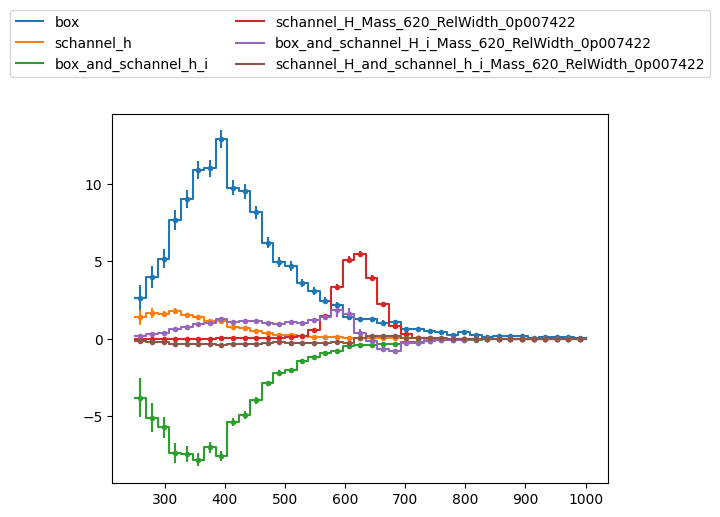

In [ ]:
MakePlots(hists=hists_scaled, labels=weights)

To test if the reweighting worked correctly we can compare it to a MC sample generated for the exact benchmark point

We build a dataframe from the included hepmc file and then make a histogram

In [ ]:
df_singlet = read_hepmc_particles('events_singletBM620_6k.hepmc',5000)

Processing event 1


<ipython-input-17-4a81b5cd0625>:37: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  out = pd.concat([out, pd.DataFrame([{"weight": xsec, "h1_4vec": higgs_lastcopy[0], "h2_4vec": higgs_lastcopy[1],


Processing event 1001
Processing event 2001
Processing event 3001
Processing event 4001
Processing event 5001


In [ ]:
hist_singlet = MakeHistogram(df_singlet, 'hh_mass_reco', weights=['weight'],bins=40)

For our reweighted histograms we can then sum together the individual contributions and the compare this to the MC which was generated for this benchmark

In [ ]:
def SumHists(hists):
    hist_sum = np.zeros(hists[0][0].shape)
    hist_sum_sq = np.zeros(hists[0][0].shape)
    for hist in hists:
        hist_sum += hist[0]
        hist_sum_sq += hist[1]**2
    hist_sum_err = np.sqrt(hist_sum_sq)

    return hist_sum, hist_sum_err, hists[0][2]

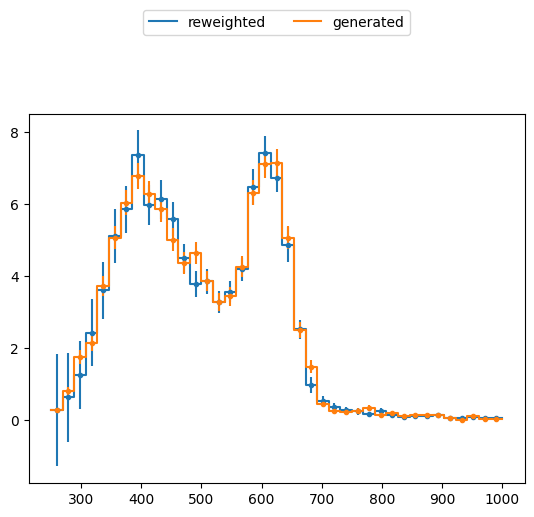

In [ ]:
hist_total = SumHists(hists_scaled)
MakePlots(hists=[hist_total,hist_singlet], labels=['reweighted','generated'])

The two histograms agree with each other within statistics so we are confident that the method works properly.